In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq

month = 1
year = 2024
path = Path("..") / "data" / "raw" / f"rides_{year}_{month:02}.parquet"

table = pq.read_table(path)
rides = table.to_pandas()
rides.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [11]:
rides_cp = rides.copy()
rides_cp["duration"] = rides["tpep_dropoff_datetime"] - rides["tpep_pickup_datetime"]
rides_cp.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,0 days 00:19:48
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0 days 00:06:36
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,0 days 00:17:55
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,0 days 00:08:18
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,0 days 00:06:06


In [13]:
rides_cp["duration"].describe().T

count                   2964624
mean     0 days 00:15:36.777037
std      0 days 00:34:51.063215
min           -1 days +23:46:26
25%             0 days 00:07:09
50%             0 days 00:11:38
75%             0 days 00:18:41
max             6 days 13:35:24
Name: duration, dtype: object

In [14]:
rides_cp["duration"].quantile(0)
rides_cp["duration"].quantile(0.01)
rides_cp["duration"].quantile(0.995)
rides_cp["duration"].quantile(0.999)

Timedelta('-1 days +23:46:26')

Timedelta('0 days 00:00:36')

Timedelta('0 days 01:10:35')

Timedelta('0 days 01:54:52.262000')

In [15]:
duration_filter = (rides_cp["duration"] > pd.Timedelta(0)) & (rides_cp["duration"] <= pd.Timedelta(hours=5))
sum(~duration_filter)

2684

In [16]:
rides_cp["total_amount"].describe().T

count    2.964624e+06
mean     2.680150e+01
std      2.338558e+01
min     -9.000000e+02
25%      1.538000e+01
50%      2.010000e+01
75%      2.856000e+01
max      5.000000e+03
Name: total_amount, dtype: float64

In [23]:
rides_cp["total_amount"].quantile(0.0)
rides_cp["total_amount"].quantile(0.012)
rides_cp["total_amount"].quantile(0.995)
rides_cp["total_amount"].quantile(0.999)

np.float64(-900.0)

np.float64(0.0)

np.float64(113.56884999999775)

np.float64(175.67754000000656)

In [24]:
rides_cp["total_amount"].max()

np.float64(5000.0)

In [25]:
total_amount_filter = (rides_cp["total_amount"]  > 0) & (rides_cp["total_amount"] <= rides_cp["total_amount"].quantile(0.999))
sum(~total_amount_filter) / rides_cp.shape[0] * 100

1.3116334482888892

<Axes: title={'center': 'Box Plot of Categories'}>

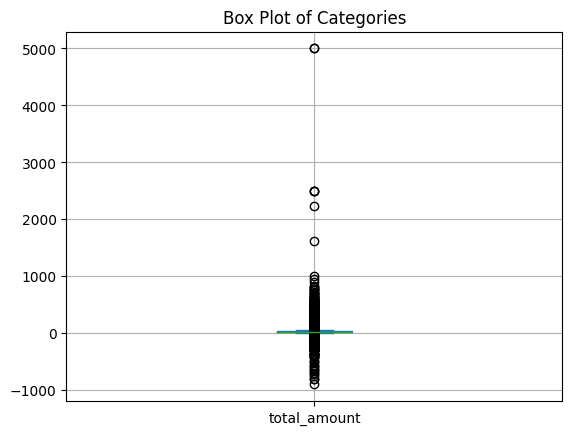

In [26]:
rides_cp["total_amount"].plot.box(title="Box Plot of Categories", grid=True)

In [27]:
nyc_locations = ~rides_cp["PULocationID"].isin((1, 264, 265))
sum(~nyc_locations)                                        

12313

In [28]:
sorted_df = rides_cp.sort_values(by="tpep_pickup_datetime", ascending=True)  

# Get the top 10 (smallest) and bottom 10 (largest) values  
top_10 = sorted_df.head(10)  
bottom_10 = sorted_df.tail(10)  

top_10

bottom_10

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
53119,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,-6.5,0.00,-0.5,0.00,0.00,-1.0,-10.50,-2.5,0.0,0 days 00:06:02
53120,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,6.5,0.00,0.5,0.00,0.00,1.0,10.50,2.5,0.0,0 days 00:06:02
2558056,2,2009-01-01 00:24:09,2009-01-01 01:13:00,2.0,10.88,1.0,N,138,264,2,50.6,9.25,0.5,0.00,6.94,1.0,68.29,0.0,0.0,0 days 00:48:51
1230169,2,2009-01-01 23:30:39,2009-01-02 00:01:39,1.0,10.99,1.0,N,237,264,2,45.0,3.50,0.5,0.00,0.00,1.0,50.00,0.0,0.0,0 days 00:31:00
10915,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,4.4,3.50,0.5,0.00,0.00,1.0,9.40,0.0,0.0,0 days 00:03:00
369,2,2023-12-31 23:39:17,2023-12-31 23:42:00,2.0,0.47,1.0,N,90,68,1,5.1,1.00,0.5,0.00,0.00,1.0,10.10,2.5,0.0,0 days 00:02:43
753,2,2023-12-31 23:41:02,2023-12-31 23:48:03,1.0,0.40,1.0,N,246,246,2,7.2,1.00,0.5,0.00,0.00,1.0,12.20,2.5,0.0,0 days 00:07:01
3176,2,2023-12-31 23:47:28,2023-12-31 23:57:07,2.0,1.44,1.0,N,68,137,1,10.7,1.00,0.5,3.14,0.00,1.0,18.84,2.5,0.0,0 days 00:09:39
2985,2,2023-12-31 23:49:12,2024-01-01 00:04:32,1.0,3.14,1.0,N,234,237,1,17.0,1.00,0.5,6.60,0.00,1.0,28.60,2.5,0.0,0 days 00:15:20
8628,2,2023-12-31 23:54:27,2024-01-01 00:13:12,1.0,7.70,1.0,N,229,244,1,33.1,1.00,0.5,7.62,0.00,1.0,45.72,2.5,0.0,0 days 00:18:45


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
2822495,2,2024-01-31 23:59:44,2024-02-01 00:04:36,2.0,1.26,1.0,N,141,140,1,7.9,1.00,0.5,2.58,0.00,1.0,15.48,2.5,0.00,0 days 00:04:52
2823644,2,2024-01-31 23:59:47,2024-02-01 00:25:47,1.0,13.40,4.0,N,132,265,1,74.4,1.00,0.5,10.00,0.00,1.0,88.65,0.0,1.75,0 days 00:26:00
2823210,2,2024-01-31 23:59:50,2024-02-01 00:05:35,1.0,0.69,1.0,N,163,50,1,7.2,1.00,0.5,2.44,0.00,1.0,14.64,2.5,0.00,0 days 00:05:45
2823886,2,2024-01-31 23:59:51,2024-02-01 00:41:45,2.0,19.03,2.0,N,132,262,1,70.0,0.00,0.5,10.00,6.94,1.0,92.69,2.5,1.75,0 days 00:41:54
2823379,2,2024-01-31 23:59:54,2024-02-01 00:00:06,1.0,0.00,1.0,N,70,70,2,3.0,1.00,0.5,0.00,0.00,1.0,5.50,0.0,0.00,0 days 00:00:12
2822366,1,2024-01-31 23:59:54,2024-02-01 00:30:47,1.0,5.60,1.0,N,132,216,3,29.6,1.75,0.5,0.00,0.00,1.0,32.85,0.0,1.75,0 days 00:30:53
2823129,2,2024-01-31 23:59:55,2024-02-01 00:09:38,1.0,1.66,1.0,N,68,246,1,12.1,1.00,0.5,2.00,0.00,1.0,19.10,2.5,0.00,0 days 00:09:43
2822693,2,2024-02-01 00:00:17,2024-02-01 00:20:13,1.0,8.93,1.0,N,138,152,2,36.6,6.00,0.5,0.00,6.94,1.0,52.79,0.0,1.75,0 days 00:19:56
2822633,2,2024-02-01 00:00:39,2024-02-01 00:12:08,5.0,2.22,1.0,N,186,79,1,13.5,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00,0 days 00:11:29
2823026,2,2024-02-01 00:01:15,2024-02-01 00:06:30,1.0,1.10,1.0,N,161,234,1,7.9,1.00,0.5,2.58,0.00,1.0,15.48,2.5,0.00,0 days 00:05:15


In [31]:
filter_date_range = (rides_cp["tpep_pickup_datetime"] >= "2024-01-01") & (rides_cp["tpep_pickup_datetime"] < "2024-02-01")
sum(~filter_date_range)

18

In [44]:
final_filter = duration_filter & total_amount_filter & nyc_locations & filter_date_range
numbers_dropped = final_filter.shape[0] - sum(final_filter) # numbers dropped
numbers_dropped
numbers_dropped/final_filter.shape[0] * 100 # percentage dropped

53141

1.7925038723291722

In [45]:
rides = rides[final_filter]
rides = rides[["tpep_pickup_datetime", "PULocationID"]]
rides.rename(columns={
    "tpep_pickup_datetime": "pickup_datetime",
    "PULocationID": "pickup_location_id"
}, inplace=True)
rides.head()
year = 2024
month = 1
path = Path("..") / "data" / "processed" / f"rides_{year}_{month:02}.parquet"
rides.to_parquet(path, engine="pyarrow", index=False)

,pickup_datetime,pickup_location_id
0,2024-01-01 00:57:55,186
1,2024-01-01 00:03:00,140
2,2024-01-01 00:17:06,236
3,2024-01-01 00:36:38,79
4,2024-01-01 00:46:51,211
